### Term Project: Predicting Wine quality rating
### Student : Swapnil Chavan
### Mentor : Dr. Brett Werner
### Subject: DSC 550 Data Mining

## CLICK HERE TO GO TO [Milestone 1](#ProjectMileStone1) [Milestone 2](#milestone2) [Milestone 3](#milestone3) 

<a id='ProjectMileStone1'></a>

#### Project Milestone 1

#### Description:

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests. This dataset contains various chemical properties of different wines along with their quality ratings. It's often used for regression tasks, where the goal is to predict the quality of a wine based on its chemical composition.

#### Data Source:

The data is available on [UCI Machine Learning Repositiry](https://archive.ics.uci.edu/dataset/186/wine+quality)

* #### Features

1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

* #### Target Varibale

 Quality: Wine quality rating (score between 0 and 10)

##### Let's read the data

In [1]:
import pandas as pd

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv("C:/Users/swapn/Data Mining/wine+quality/winequality-white.csv", sep=";")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.shape

(4898, 12)

#### Data Preprocessing

Let's see if any missing values in the dataframe

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Fortunately there is no missing data

Lets see the histogram of all the variables in the dataframe

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

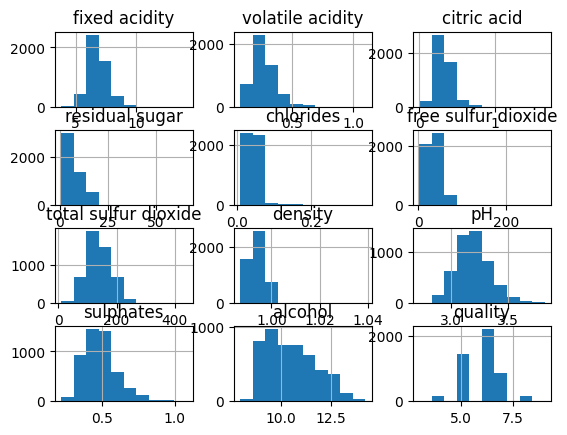

In [7]:
df.hist()

The Quality variable seems normally distributed, lets just see if there are any outliers using boxplot

In [8]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8a9b5d190>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8a9d76de0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8a9b73f20>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8a9d77410>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8a9d77710>],
 'means': []}

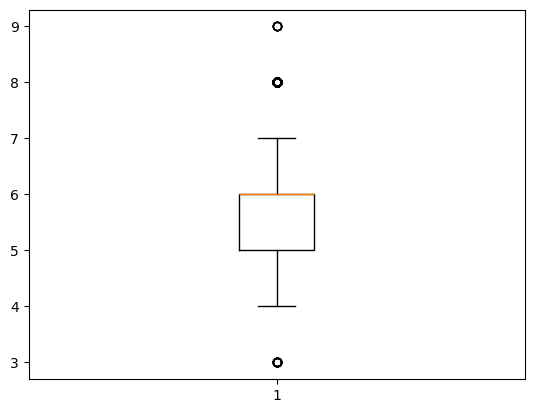

In [9]:
plt.boxplot(df['quality'])

The ideal data seems between the ratings 4 and 7 but because we have rating between 1 to 10, I think it is part of natural processing and lets not get rid of the extremes

Lets plot a correlation matrix

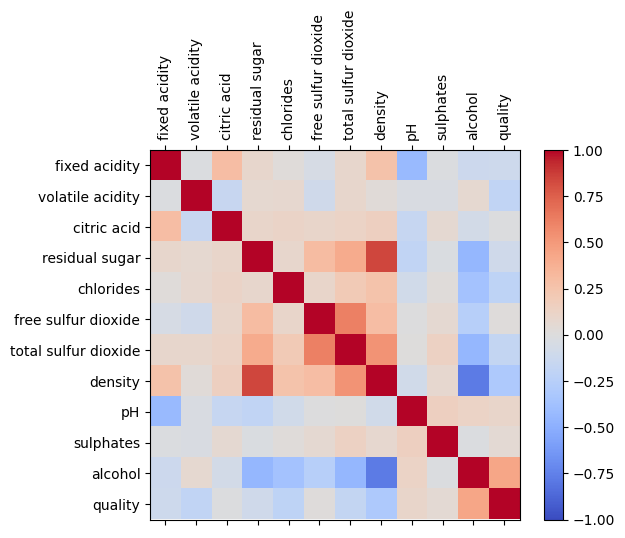

In [10]:
import numpy as np
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

With this colors it does not give us a clear picture of correlation. We will perform some feature selection techniques down the line.

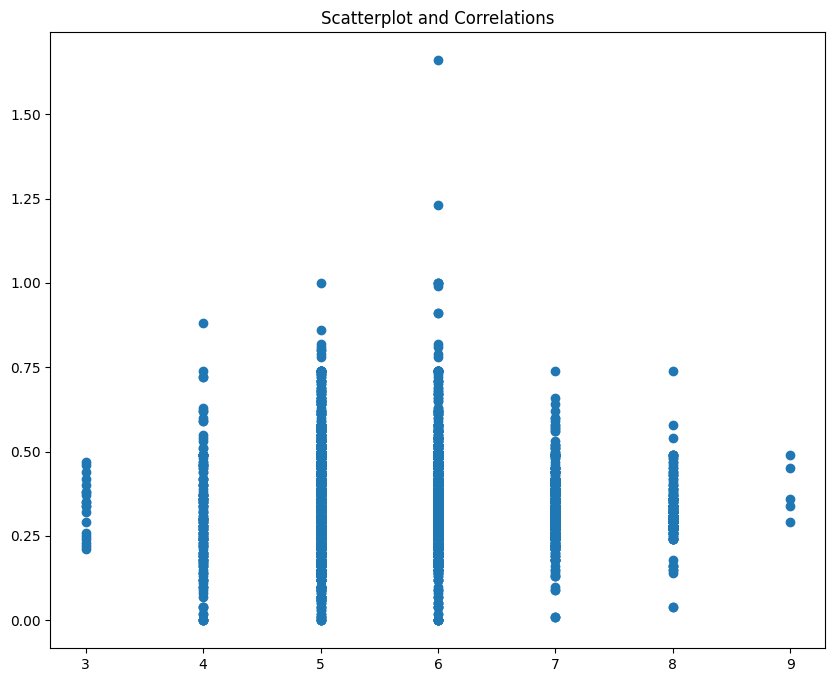

In [11]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df.quality, df['citric acid'])
#plt.scatter(df.quality, df['residual sugar'], label=f'y2 Correlation = {np.round(np.corrcoef(df.quality, df['residual sugar']), 2)}')
#plt.scatter(df.quality, df['alcohol'], label=f'y3 Correlation = {np.round(np.corrcoef(df.quality, df['alcohol']), 2)}')

# Plot
plt.title('Scatterplot and Correlations')
plt.show()

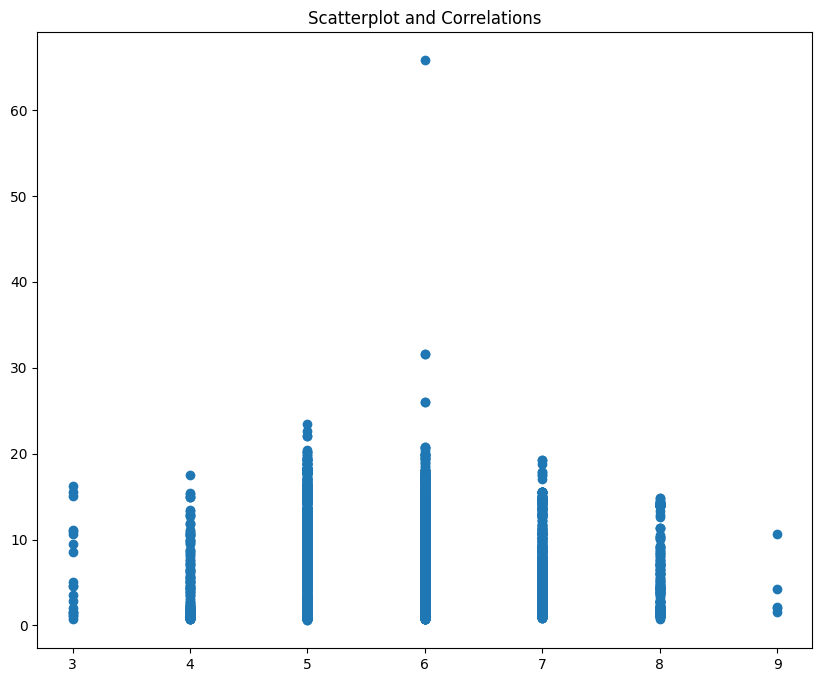

In [12]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df.quality, df['residual sugar'])
#plt.scatter(df.quality, df['alcohol'], label=f'y3 Correlation = {np.round(np.corrcoef(df.quality, df['alcohol']), 2)}')

# Plot
plt.title('Scatterplot and Correlations')
plt.show()

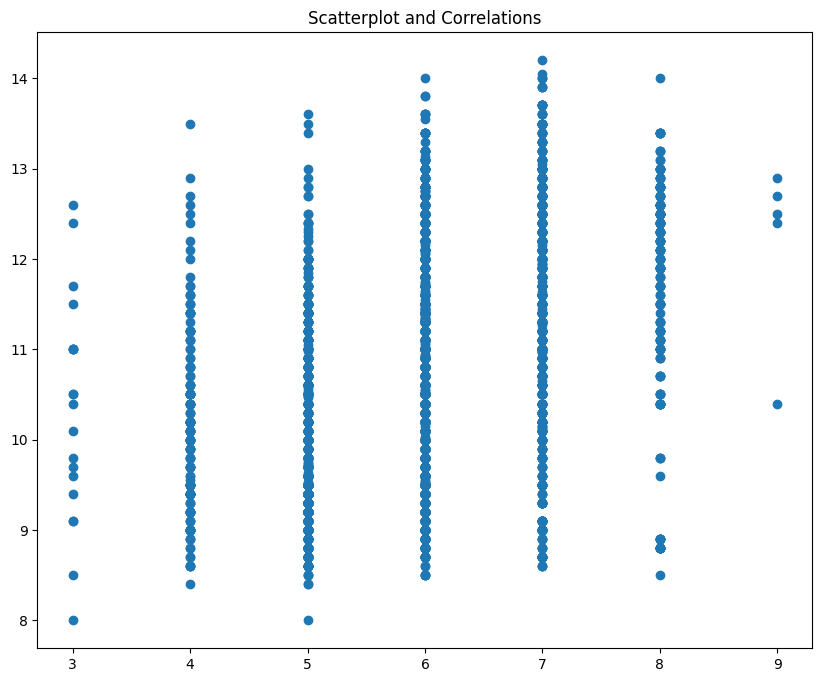

In [13]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df.quality, df['alcohol'])

# Plot
plt.title('Scatterplot and Correlations')
plt.show()

There doesn't seem any correlation between these variables

<a id="milestone2"></a>

#### Project Milestone 2

So far we imported the data, with the scatter plots we were not able to find if there is any correlation between quality and 3 other variables. We could not find if there is any correlation.

#### Feature Engineering 

We have fixed acidity and volatile acidity, lets find a ratio of volatile acidity and fixed acidity and add that as a new feauture

In [14]:
df['volatile acidity Ratio'] = round(df['volatile acidity']/df['fixed acidity'],2)

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,volatile acidity Ratio
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.04
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.05
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.03
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.03
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.03


I dont think there is any scope to perform more feature engineering

The next step we are going to do is to find the best feature which significantly impacts the quality

We don't need to label encode as the values aren't categorical 

In [16]:
from sklearn.feature_selection import chi2

In [17]:
X = df.drop('quality',axis=1)
y = df['quality']

In [18]:
chi_scores = chi2(X,y)

In [19]:
chi_scores

(array([7.92204173e+00, 1.26226360e+01, 8.51118028e-01, 5.01235224e+02,
        2.52900536e+00, 9.47712845e+02, 3.35829843e+03, 5.06505644e-03,
        4.28745485e-01, 5.79205686e-01, 1.55078234e+02, 1.46491555e+00]),
 array([2.43870564e-001, 4.94356380e-002, 9.90632487e-001, 4.55630751e-105,
        8.65207484e-001, 1.81495996e-201, 0.00000000e+000, 9.99999997e-001,
        9.98600701e-001, 9.96736967e-001, 6.52231567e-031, 9.61790939e-001]))

In [20]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<Axes: >

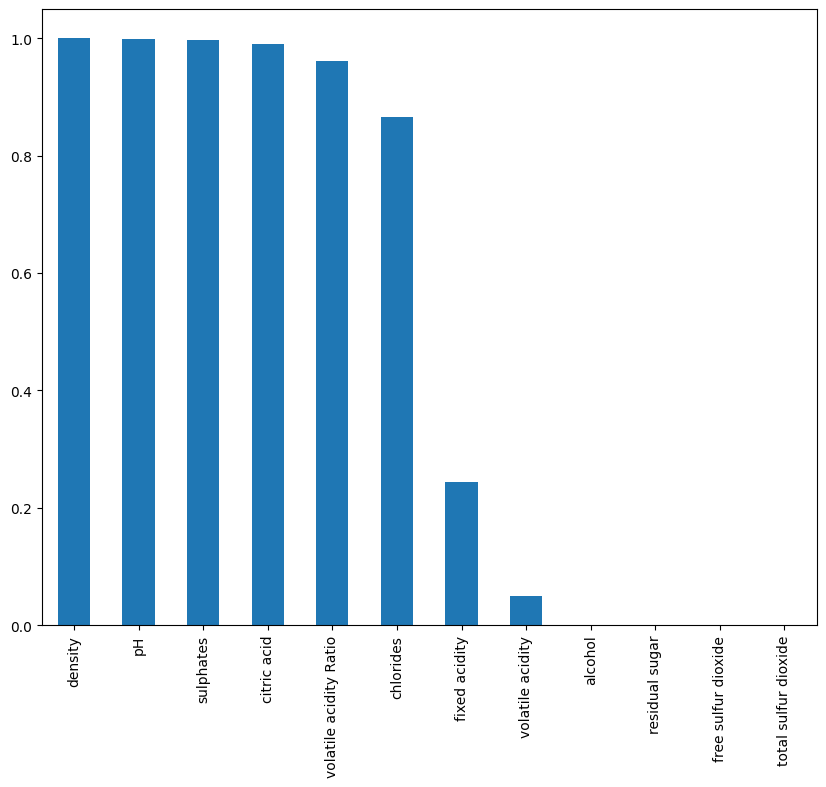

In [21]:
p_values.plot.bar()

Per the p values above,  density, pH, suplhates, citric acid, volatile acidity ratio and clorides are not statistically significant i.e. p-value > 0.5

Our ultimate goal is to find 5 best feature to train the model

Use a chi2 selector to pick the five best features for this data

Some of the commonly used score_func functions in SelectKBest:

* f_regression: It is used for linear regression problems and computes F-value between feature and target.
* mutual_info_regression: It is used for regression problems and computes mutual information between two random variables.
* f_classif: It is used for classification problems and computes ANOVA F-value between feature and target.
* mutual_info_classif: It is used for classification problems and computes mutual information between two discrete variables.
* chi2: It is used for classification problems and computes chi-squared statistics between each feature and target.
* SelectPercentile: It is used to select the highest X% of the features based on the score_func.

Because our problem best fits into classifcation problem, classes being rating between 1 and 10, we are going to use chi2 score function here

In [22]:
from sklearn.feature_selection import SelectKBest

In [23]:
sel5 = SelectKBest(score_func=chi2, k=5)
clf = sel5.fit(df.fillna(0),y)

In [24]:
df.columns[sel5.get_support()].to_numpy()
df3 = sel5.transform(df)
df3 = pd.DataFrame(df3)

Let's find the Best Feature selected by the KBest

In [25]:
features_names = clf.get_feature_names_out()
print(features_names)

['residual sugar' 'free sulfur dioxide' 'total sulfur dioxide' 'alcohol'
 'quality']


let's change the column names

In [26]:
df3.columns = features_names

In [27]:
df3.head()

,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol,quality
0,20.7,45.0,170.0,8.8,6.0
1,1.6,14.0,132.0,9.5,6.0
2,6.9,30.0,97.0,10.1,6.0
3,8.5,47.0,186.0,9.9,6.0
4,8.5,47.0,186.0,9.9,6.0


##### df3 is our final dataframe with the best features selected.

<a id="milestone3"></a>

#### Project Milestone 3

Now that we have the best features selected we have to select the best Machine Learning algorithm for our classification problem.

Our data is labeled data and there is no dimentionality reduction for that reason it is going to be supervised algorithm.

The target variable in the data is the quality rating, ranging between 1 to 10. This is a case of classfication. We should not be using linear regression

Also, it is not a binary classfication hence the logistic regression should not be used

We are going to use **K-Nearest Neighbor i.e. KNN, Random Forest Classifier and Support Vector Machine (SVM).** We will fine tune these models and pick the best model and the best parameters.

**K-Nearest Neighbor i.e. KNN**

The concept behind the KNN is simple. Given an unclassified point, we can assign it to a group by observing what group its nearest neighbors belong to. This means a point close to a cluster of points classified as ‘Red’ has a higher probability of getting classified as ‘Red’.

**Random Forest**

The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

**Support Vector Machine**

 The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three.

SVM is about how do we choose the best line or in general the best hyperplane that segregates our data points.

Let's import the packages

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve

Let's try out different parameters. We are going to use GridSeacrhCV. GridSearchCV makes it easy to paranterised the models and come up with the best model, best score etc.

In [29]:
from sklearn.model_selection import GridSearchCV

Creating a parameters' JSON, we need this to pass to GridSearchCV.

In [30]:
params = {
    "randomForest": {
    "model": RandomForestClassifier(),
    "params": {
            "n_estimators":[5, 10, 15]
        }
    },
    "KNN": {
    "model": KNeighborsClassifier(),
    "params": {
            "n_neighbors": range(5, 8)
        }
    }
}

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
y = df3['quality']
X = df3.drop('quality', axis=1)

# Split into training and test and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
scores = []

In [34]:
for model_name , model_params in params.items():
    model_func = GridSearchCV(model_params["model"], model_params["params"], cv=5 , return_train_score=False)
    model_func.fit(X_train, y_train)
    scores.append({"model":model_name,
                 "best_score": model_func.best_score_,
                 "best_params": model_func.best_params_})
    scores_df = pd.DataFrame(scores)
    print(scores_df)
    
    y_pred = model_func.predict(X_test)
    print("Test Set accuracy score is", accuracy_score(y_test, y_pred))
    print("Test Set F1 score is", f1_score(y_test, y_pred, average='micro'))
    

    print ("Let's check scores on a validation set")
    y_pred_val = model_func.predict(X_test_val)
    
    print("Validation Set accuracy score is", accuracy_score(y_test_val, y_pred_val))
    print("Validation F1 score is", f1_score(y_test_val, y_pred_val, average='micro'))
    
    

          model  best_score           best_params
0  randomForest     0.60093  {'n_estimators': 15}
Test Set accuracy score is 0.6129251700680272
Test Set F1 score is 0.6129251700680272
Let's check scores on a validation set
Validation Set accuracy score is 0.6138775510204082
Validation F1 score is 0.6138775510204082
          model  best_score           best_params
0  randomForest    0.600930  {'n_estimators': 15}
1           KNN    0.459739    {'n_neighbors': 6}
Test Set accuracy score is 0.44693877551020406
Test Set F1 score is 0.44693877551020406
Let's check scores on a validation set
Validation Set accuracy score is 0.4448979591836735
Validation F1 score is 0.4448979591836735


If you see the scores after the hyperparameter tuning , it is clear that Random Forest is our best model with the parameter as n_estimators = 15

Let's try different params with random forest model

In [35]:
gs = GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})
gs.fit(X_train, y_train)

C:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [36]:
gs.best_score_

0.6128879998297547

In [37]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 100}

#### Metrics for the ML models

As we have seen above, the best model for our classification model tunrned out to be a Random Forest classifier. The best scores we got from the gridsearchCV is 0.60 with the parameter n_estimator = 15. KNN model comparative have lesser accuracy.

Accuracy and F1-score are the most common metrics used for the classification model involving multiple classes.

with RandomForest classifier our accuracy score is 61% and F1-score is also 61% on the test set.

#### Overfitting??

Like we have seen in above steps, along with the test set we have created a validation set as well. Both the models RandomForest and KNN perform equally well on test as well as validation set. Since RandomForest is the best model for our problem, it is found with RandomForest classfier that the accuracy score is 61% ad F1 score too is 61%. The model does not seem to be overfitting. We are good here.

***Summary***

- Accuracy: 60%
- Model Performance: The model correctly predicts the target outcome 60% of the time on unseen data.
- Interpretation: The model's predictions are better than random guessing, but there is room for improvement.
- Use Cases: The model may be useful in some scenarios, but its performance may not be sufficient for critical or high-stakes applications.
- Improvement: Consider optimizing the model by tuning hyperparameters, feature engineering, using a more complex model, or gathering more data to improve accuracy.